# Branch regulator detection

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
import phlower
phlower.__version__

'0.1.3'

In [3]:
!mkdir save
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle -O save/multiome_phlower.pickle
!wget --no-check-certificate --no-verbose  https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 -O save/multiome_chromvar.h5

mkdir: cannot create directory ‘save’: File exists
2024-10-16 12:56:12 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_phlower.pickle [4365968492/4365968492] -> "save/multiome_phlower.pickle" [1]
2024-10-16 12:56:13 URL:https://costalab.ukaachen.de/open_data/PHLOWER/multiome_chromvar.h5 [73101100/73101100] -> "save/multiome_chromvar.h5" [1]


In [4]:
import pickle as pkl 
adata = pkl.load(open("save/multiome_phlower.pickle", 'rb'))

tfbdata = sc.read_10x_h5("save/multiome_chromvar.h5")
tfbdata.var_names = [i.upper() for i in tfbdata.var_names]

assert(all(tfbdata.obs_names == adata.obs_names))

import copy
tfbdata.obs = copy.deepcopy(adata.obs)
tfbdata.obsm = copy.deepcopy(adata.obsm)
tfbdata.uns = copy.deepcopy(adata.uns)


## Podocytes regulator versus Tubular

In [5]:
phlower.tl.branch_regulator_detect(adata, tfbdata, branch='Podocytes', log2fc=1, correlation=0.7)

branch_2 ['Tubular']
vs_name:  markers_Podocytesvs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1133: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


#### TF markers volcano

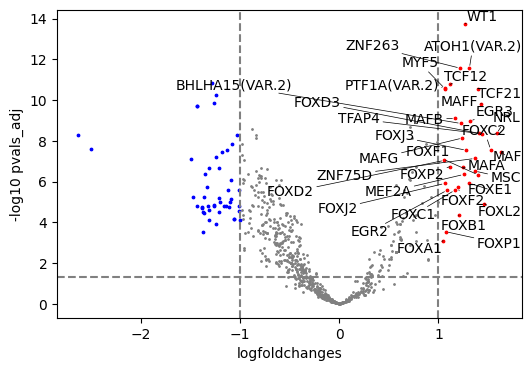

In [6]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_Podocytesvs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-1, 1],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

#### TF gene correlations

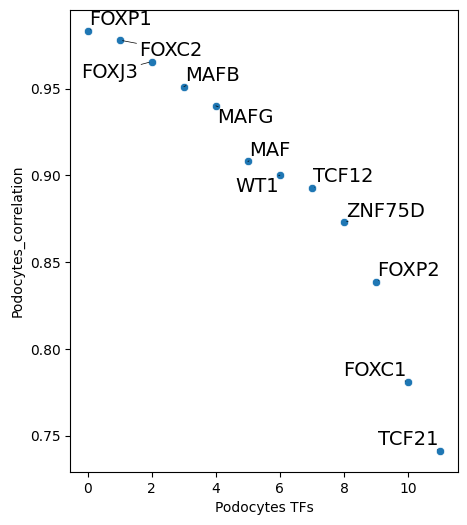

In [7]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'Podocytes', ax=ax)

#### Heatmap along Podocytes trajectory

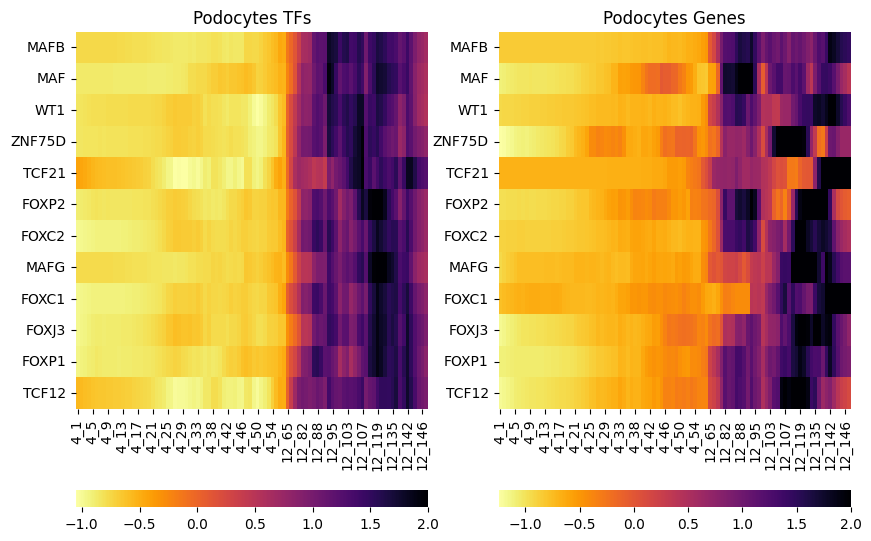

In [8]:
_,axes = phlower.pl.regulator_heatmap(adata, tfbdata, 'Podocytes', figsize=(10, 7))

## Tubular regulator versus Podocytes

In [9]:
phlower.tl.branch_regulator_detect(adata, tfbdata, branch='Tubular', log2fc=1, correlation=0.7)

branch_2 ['Podocytes']
vs_name:  markers_Tubularvs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1133: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


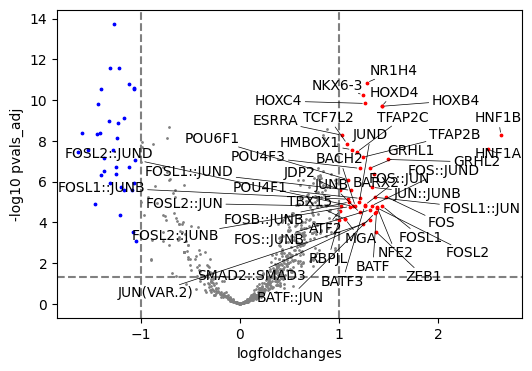

In [10]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_Tubularvs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-1, 1],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

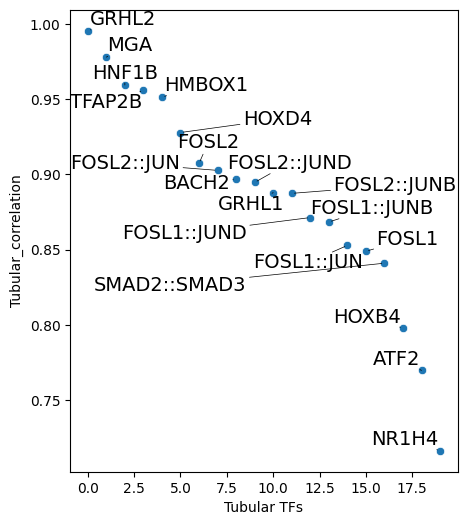

In [11]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'Tubular', ax=ax)

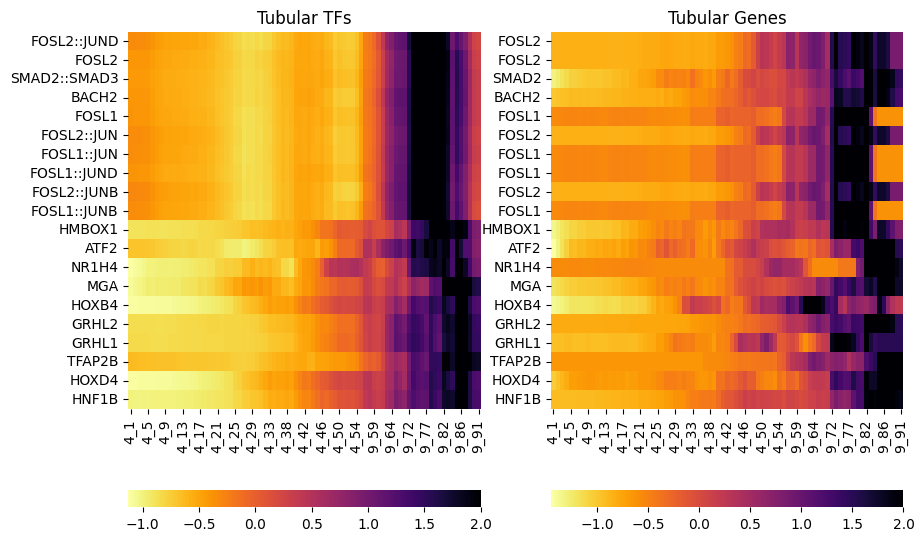

In [12]:
_,axes = phlower.pl.regulator_heatmap(adata, tfbdata, 'Tubular', figsize=(10, 7))

## Muscle regulator versus Nueron-1 & Nueron-2

In [13]:
phlower.tl.branch_regulator_detect(adata, tfbdata, branch='Muscle', log2fc=0.5, correlation=0.7)

branch_2 ['Neuron-2', 'Neuron-1']
vs_name:  markers_Musclevs


/home/sz753404/miniconda3/envs/R422/lib/python3.10/site-packages/phlower/tools/tree_feature_markers.py:1133: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr = pearsonr(expression, TF)[0]


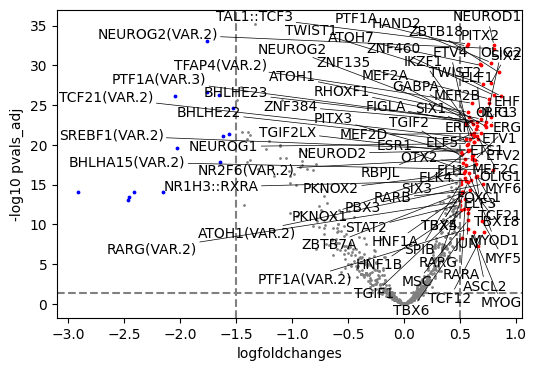

In [14]:
df = phlower.tl.get_markers_df(tfbdata, 'markers_Musclevs')
fig, ax = plt.subplots(1,1, figsize=(6, 4))
phlower.pl.volcano(df, log2fc_column='logfoldchanges', pval_column='pvals_adj',log2fc_threshold=[-1.5, 0.5],  pval_threshold=0.05, is_adjust_text=True, text_size=10, text_up_down='up', ax=ax, show_legend=False)

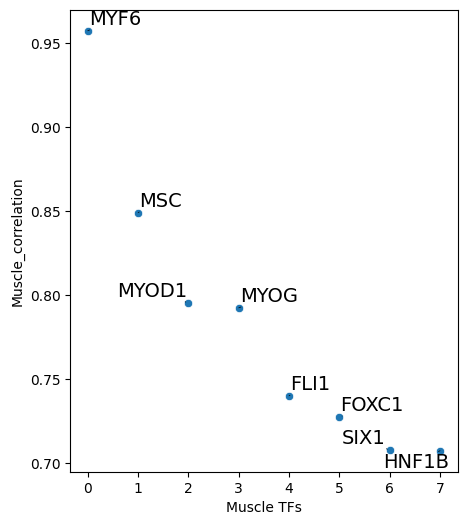

In [15]:
_, ax = plt.subplots(1,1,figsize=(5,6)) 
phlower.pl.regulator_dot_correlation(tfbdata, 'Muscle', ax=ax)

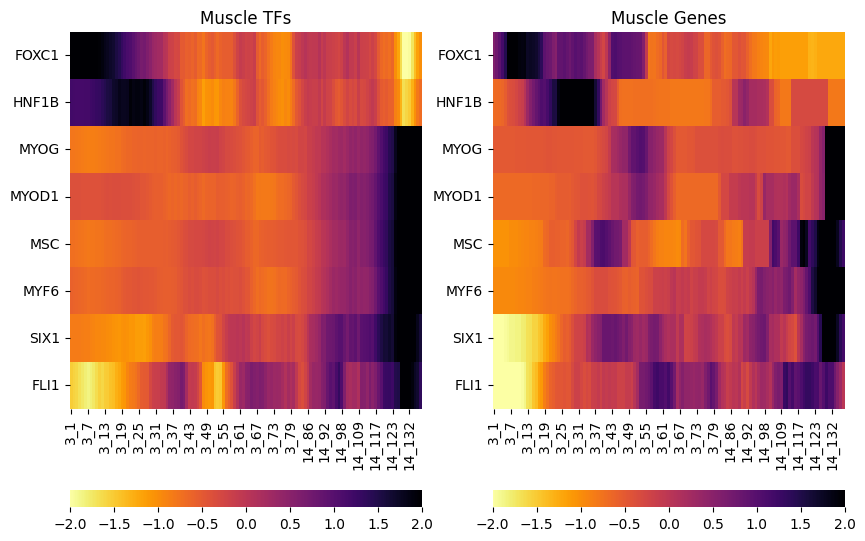

In [16]:
_,axes = phlower.pl.regulator_heatmap(adata, tfbdata, 'Muscle',  figsize=(10, 7))

In [17]:
import session_info
session_info.show()